In [88]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt


from statsmodels.tsa.statespace.sarimax import SARIMAX



In [89]:
df = pd.read_csv("db2023_cleandf.csv")

In [90]:
df.drop(columns='Comment', inplace=True)

# Display the DataFrame after dropping the 'B' column
print("\nDataFrame after dropping 'B' column:")
print(df)


DataFrame after dropping 'B' column:
                    Time  Score
0    2023-10-10 11:14:12      1
1    2023-10-10 13:55:05     39
2    2023-10-10 14:16:50      3
3    2023-10-10 16:56:05      2
4    2023-10-10 14:18:04     25
..                   ...    ...
474  2023-10-10 13:30:20     -1
475  2023-10-10 13:31:29      3
476  2023-10-10 15:30:22      1
477  2023-10-10 15:33:48      1
478  2023-10-10 15:52:32      1

[479 rows x 2 columns]


In [91]:
adfuller(df["Score"])

(-4.477154194045056,
 0.00021620009732447327,
 11,
 467,
 {'1%': -3.4444305322234365,
  '5%': -2.8677488864580885,
  '10%': -2.5700770984781443},
 3200.46646536486)

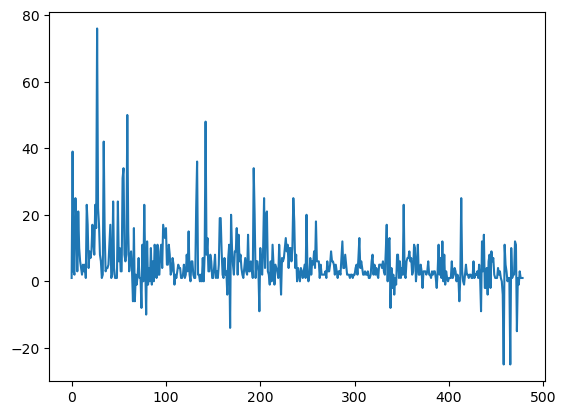

In [92]:
df["Score"].plot();

In [93]:
# Get shape our dataset to calculate our data split for testing/validating 

df.shape

(479, 2)

In [94]:
print(df.dtypes)


Time     object
Score     int64
dtype: object


In [95]:
split = int(df.shape[0] * 0.8)

In [96]:
split

383

In [97]:
df_train = df[:split]
df_test = df[split:]

In [98]:
df_train.shape

(383, 2)

In [99]:
df_test.shape

(96, 2)

In [100]:
print(df_train.dtypes)

Time     object
Score     int64
dtype: object


In [101]:
df_train.tail()

,Time,Score
378,2023-10-10 14:46:10,6
379,2023-10-10 14:51:22,2
380,2023-10-10 14:40:56,2
381,2023-10-10 14:43:53,1
382,2023-10-10 14:41:37,3


In [102]:
adfuller(df_train["Score"])

(-16.196807781013366,
 4.1162680662597123e-29,
 0,
 382,
 {'1%': -3.4475850438570115,
  '5%': -2.869135963767125,
  '10%': -2.5708164748773332},
 2567.691503173193)

In [103]:
adfuller(df_train["Score"].diff(1).dropna())

(-7.730131181332204,
 1.1311769719251672e-11,
 16,
 365,
 {'1%': -3.4483935212959844,
  '5%': -2.8694912343676497,
  '10%': -2.571005879151811},
 2580.3375871988774)

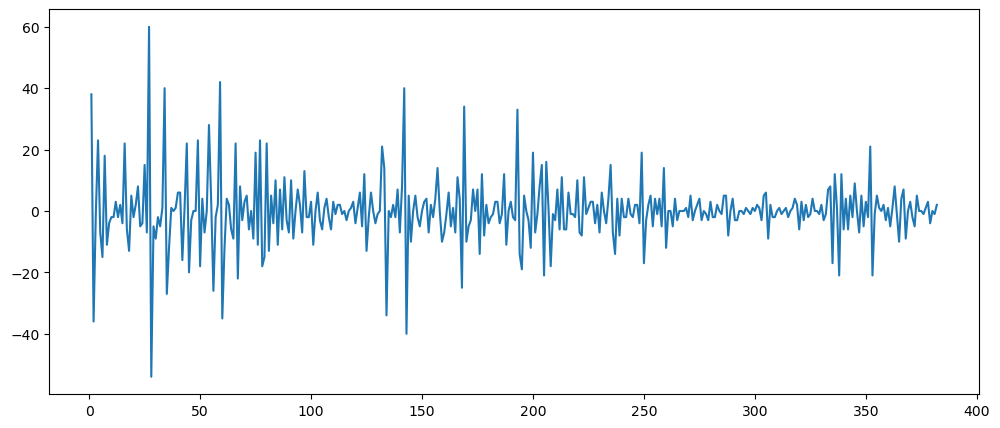

In [104]:
plt.figure(figsize= [12, 5])
plt.plot(df_train["Score"].diff(1).dropna());

In [105]:
df["Diff"] = df_train["Score"].diff(1)

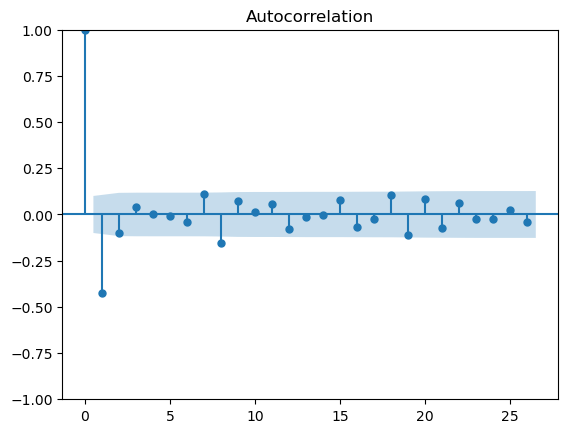

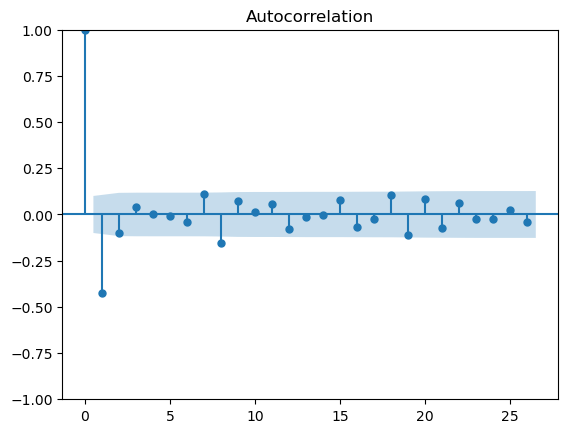

In [106]:
plot_acf(df["Diff"].dropna())

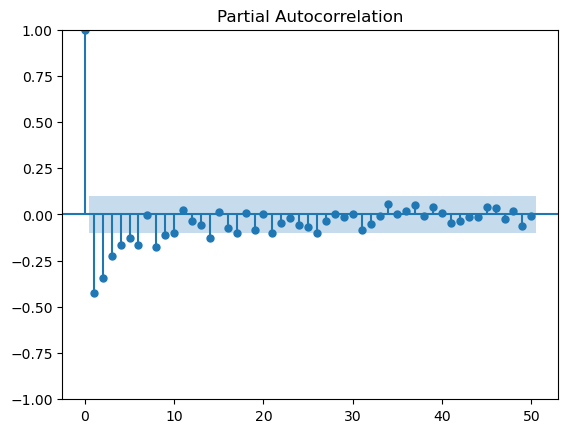

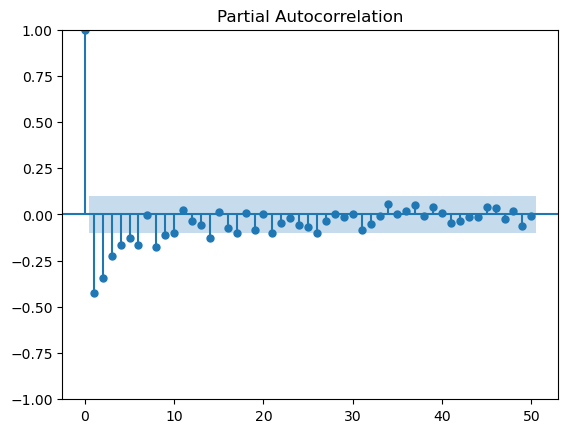

In [107]:
plot_pacf(df["Diff"].dropna(), method="ywm", lags=50)

In [108]:
aicVals = []
for p in range(5):
    for q in range(5):
        aicVals.append( [   sm.ARIMA( df["Score"], order=(p, 0, q) ).fit().aic, p, q   ] )

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-inve

In [109]:
aicVals.sort()

In [110]:
aicVals

[[3345.7007759687767, 3, 4],
 [3347.0963219967316, 3, 3],
 [3347.5907522336142, 2, 2],
 [3348.4671837724236, 1, 2],
 [3348.558644639363, 2, 1],
 [3349.0122509770226, 3, 2],
 [3349.057510765276, 2, 3],
 [3350.0181251098074, 4, 3],
 [3350.126983577823, 1, 1],
 [3350.41114040721, 1, 3],
 [3350.4787462144377, 3, 1],
 [3350.564590962179, 4, 2],
 [3350.6247783620065, 2, 4],
 [3351.693467952835, 4, 4],
 [3351.8316055192527, 4, 1],
 [3351.867902826086, 1, 4],
 [3364.514060070338, 4, 0],
 [3365.348800217611, 3, 0],
 [3368.017098004179, 0, 4],
 [3368.5668201668705, 0, 3],
 [3368.7143265681716, 1, 0],
 [3368.7436553587568, 2, 0],
 [3370.5376420364173, 0, 1],
 [3370.9375173101816, 0, 2],
 [3383.2951687764394, 0, 0]]

In [111]:
model = sm.ARIMA(df_train["Score"], order=(3, 0 , 4)).fit()

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [112]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Score   No. Observations:                  383
Model:                 ARIMA(3, 0, 4)   Log Likelihood               -1346.048
Date:                Thu, 23 Nov 2023   AIC                           2710.097
Time:                        12:55:28   BIC                           2745.629
Sample:                             0   HQIC                          2724.192
                                - 383                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7864      2.075      3.270      0.001       2.719      10.853
ar.L1         -0.8894      0.056    -15.908      0.000      -0.999      -0.780
ar.L2          0.9260      0.025     36.618      0.000       0.876       0.976
ar.L3          0.9313      0.048     19.367      0.000       0.837       1.025
ma.L1          1.0623      0.074     14.404      0.000       0.918       1.207
ma.L2         -0.7553      0.074    -10.244      0.000      -0.900      -0.611
ma.L3         -1.0215      0.073    -14.055      0.000      -1.164      -0.879
ma.L4         -0.1273      0.057     -2.242      0.025      -0.239      -0.016
sigma2        65.9190      2.597     25.382      0.000      60.829      71.009
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3781.56
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                             2.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

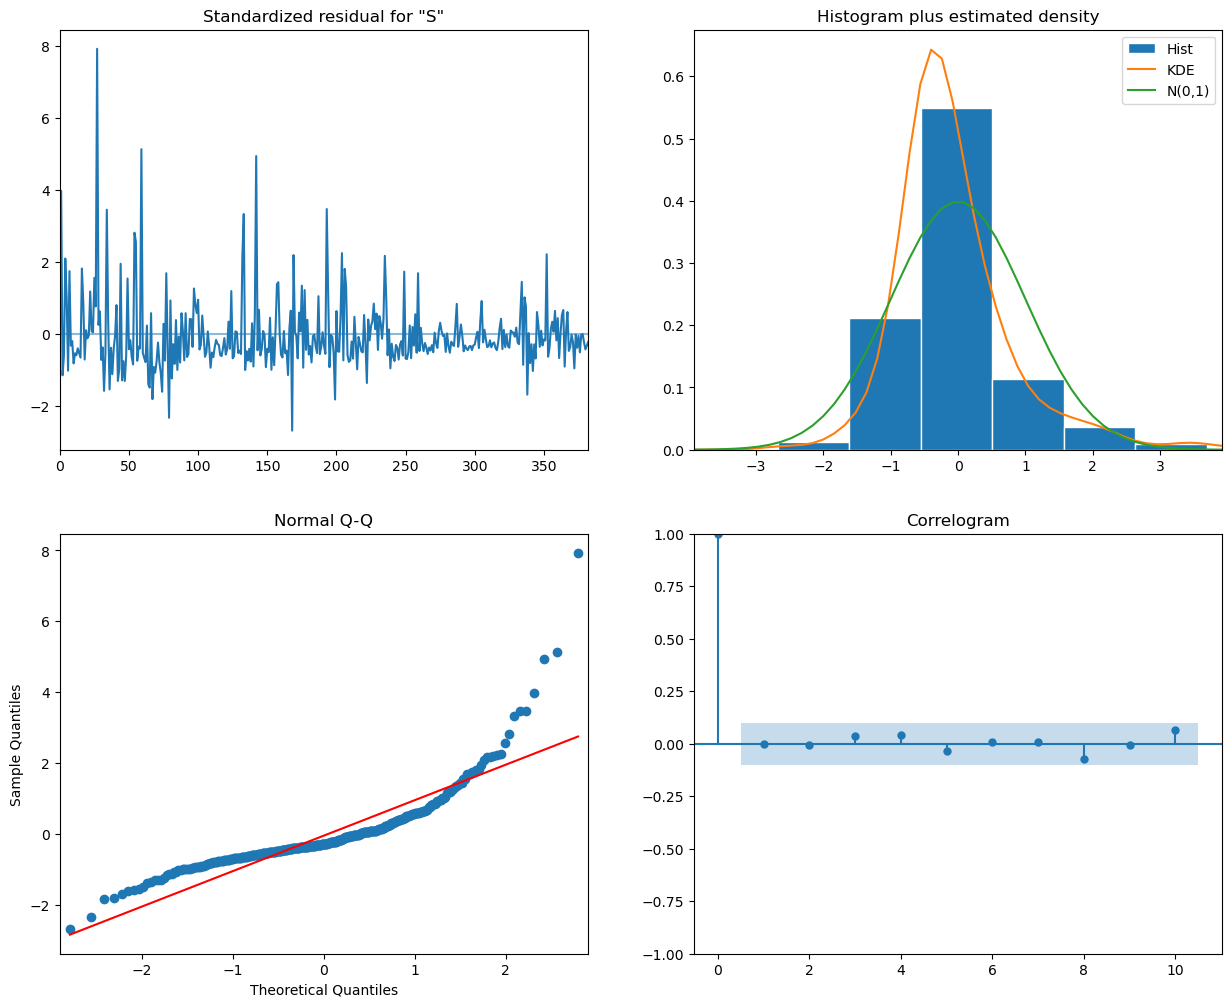

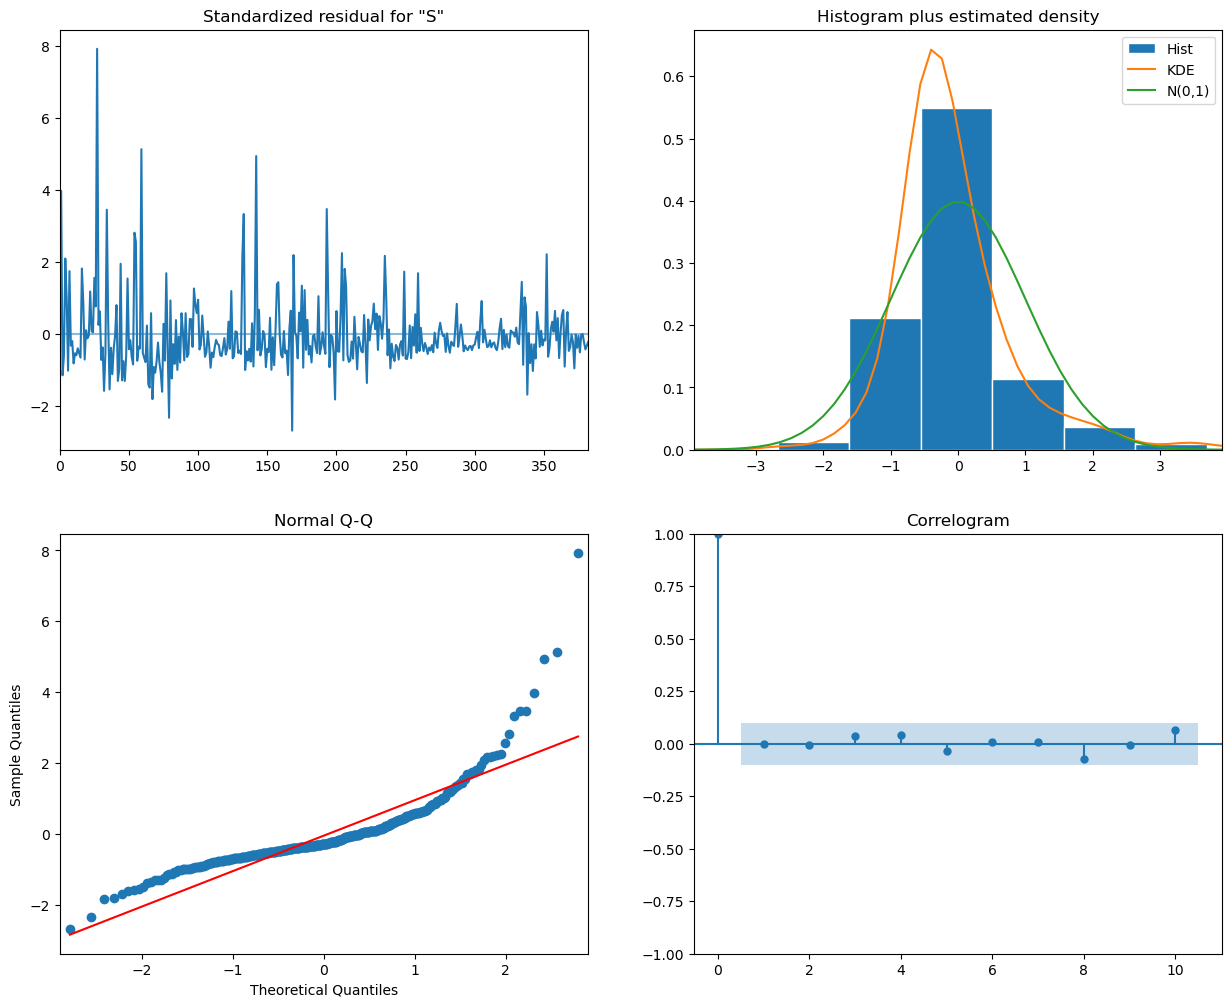

In [113]:
model.plot_diagnostics(figsize=(15, 12))

In [114]:
forecast_values = model.get_forecast(steps=(df.shape[0]-split))
forecast_ci = forecast_values.conf_int()

In [ ]:
# Plot our train values

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(-50.0, 0, '2023-10-10 14:00:00'),
  Text(0.0, 0, '2023-10-10 11:14:12'),
  Text(50.0, 0, '2023-10-10 14:34:37'),
  Text(100.0, 0, '2023-10-10 13:57:56'),
  Text(150.0, 0, '2023-10-10 18:10:30'),
  Text(200.0, 0, '2023-10-10 13:06:18'),
  Text(250.0, 0, '2023-10-10 14:44:12'),
  Text(300.0, 0, '2023-10-10 15:00:22'),
  Text(350.0, 0, '2023-10-10 14:19:38'),
  Text(400.0, 0, ''),
  Text(450.0, 0, '')])

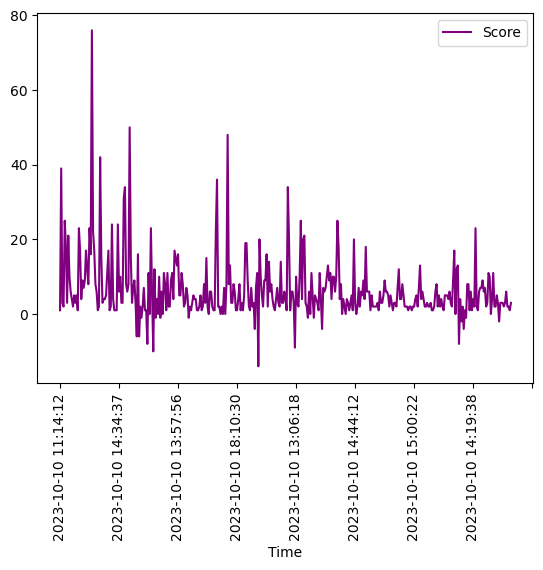

In [115]:
ax1 = df_train.plot(x="Time", y="Score", color="purple")

plt.xticks(rotation=90) 

In [ ]:
# Plot our test values

(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 [Text(-20.0, 0, '2023-10-10 16:17:04'),
  Text(0.0, 0, '2023-10-10 13:40:15'),
  Text(20.0, 0, '2023-10-10 11:31:43'),
  Text(40.0, 0, '2023-10-10 14:28:24'),
  Text(60.0, 0, '2023-10-10 19:52:11'),
  Text(80.0, 0, '2023-10-10 16:02:01'),
  Text(100.0, 0, '')])

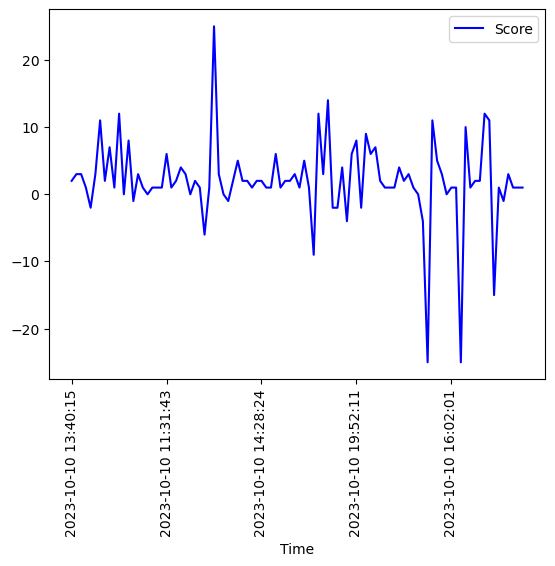

In [116]:
df_test.plot(x="Time", y="Score", color="blue")

plt.xticks(rotation=90) 

In [ ]:
# Plot with confidence Interaval 

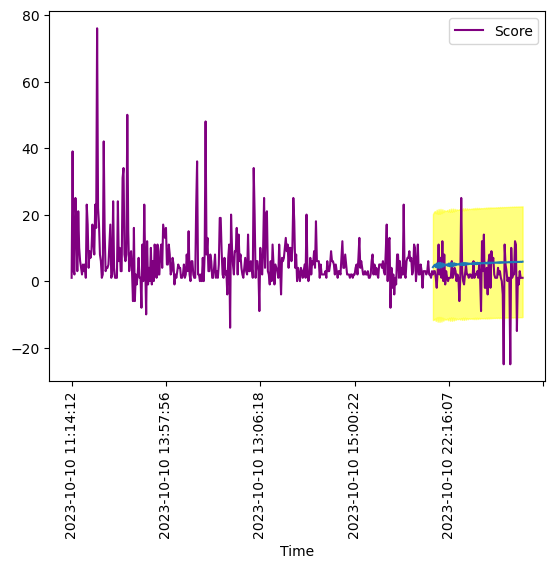

In [118]:
ax1 = df.plot(x="Time", y="Score", color="purple")
# df_test.plot(x="Date", y="Electricity", color="blue")
# plt.plot(df["Date"].iloc[split:], df_test["Electricity"], color="green")

forecast_values.predicted_mean.plot(ax = ax1, label="Forecast")

ax1.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color="yellow",
    alpha=0.5
)

plt.xticks(rotation=90) ;


<Axes: >

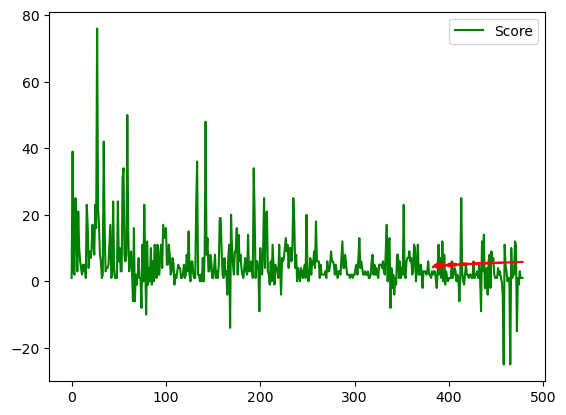

In [117]:
ax = df.plot( y="Score", legend=True, color="green")
forecast_values.predicted_mean.plot(ax=ax, label="Forecast", color="red")

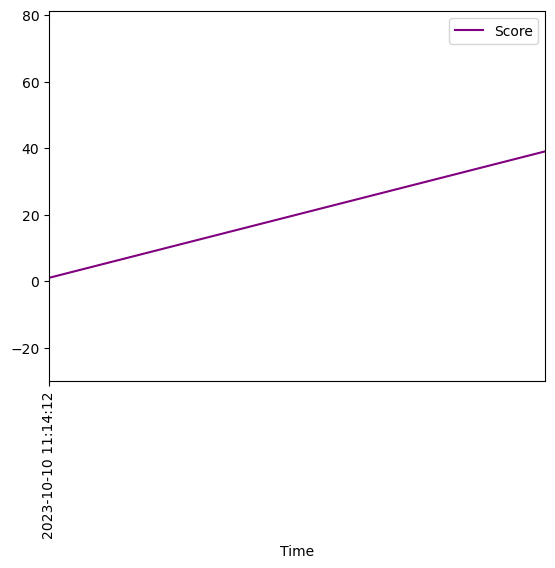

In [119]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df and forecast_values and forecast_ci are defined

ax1 = df.plot(x="Time", y="Score", color="purple")
forecast_values.predicted_mean.plot(ax=ax1, label="Forecast")

ax1.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color="yellow",
    alpha=0.5
)

plt.xticks(rotation=90)

# Get the last third of the x-axis values
last_third_x_values = df["Time"].iloc[int(2/3 * len(df)):]

# Set x-axis limits to zoom in on the last third
ax1.set_xlim([last_third_x_values.iloc[0], last_third_x_values.iloc[-1]])

plt.show()


In [ ]:
# Part 2

In [38]:
#Capturing Forcast Values

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [39]:
forecast_values.predicted_mean

383    4.205961
384    4.572087
385    4.915249
386    4.214287
387    5.279204
         ...   
474    5.776900
475    5.773469
476    5.817847
477    5.769729
478    5.850424
Name: predicted_mean, Length: 96, dtype: float64

In [40]:
df_test["Score"]

383    2
384    3
385    3
386    1
387   -2
      ..
474   -1
475    3
476    1
477    1
478    1
Name: Score, Length: 96, dtype: int64

In [41]:
r2_score(forecast_values.predicted_mean, df_test["Score"])

-247.99780531125606

In [42]:
mean_squared_error(forecast_values.predicted_mean, df_test["Score"])

49.44688932486164

<Axes: >

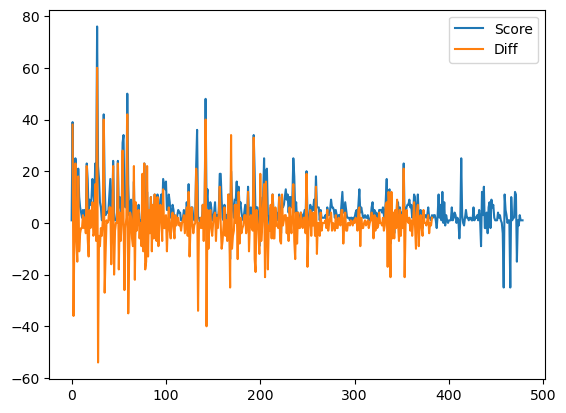

In [43]:
df.plot()

In [46]:
df.shape


(479, 3)

In [48]:
# Take last 90 observations to split for test and train

df.shape[0]-384


95

In [49]:
train2 = df.iloc[384:445]

In [50]:
test2 = df.iloc[445:]

In [52]:
train2.shape

(61, 3)

In [53]:
test2.shape

(34, 3)

In [54]:
train2.head()

,Time,Score,Diff
384,2023-10-10 13:40:15,3,NaN
385,2023-10-10 14:39:58,3,NaN
386,2023-10-10 14:42:57,1,NaN
387,2023-10-10 14:44:39,-2,NaN
388,2023-10-10 16:53:06,3,NaN


<Axes: >

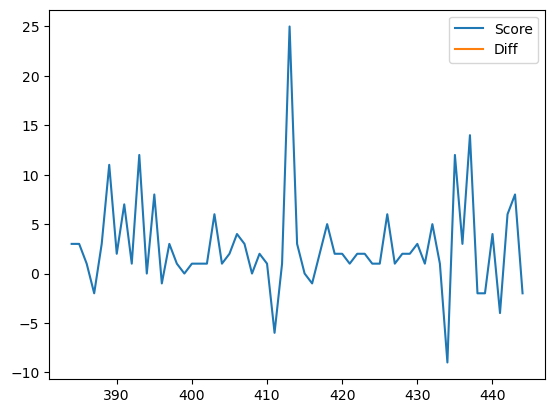

In [55]:
train2.plot()

<Axes: >

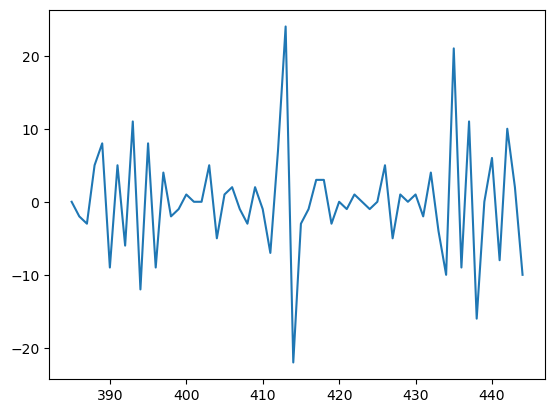

In [56]:
train2["Score"].diff(1).dropna().plot()

In [58]:
adfuller(train2["Score"].diff(1).dropna())

(-5.7436422671986325,
 6.192870460946902e-07,
 5,
 54,
 {'1%': -3.55770911573439,
  '5%': -2.9167703434435808,
  '10%': -2.59622219478738},
 307.920920124161)

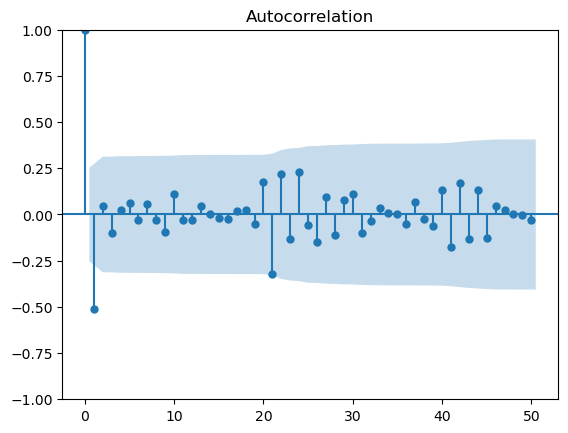

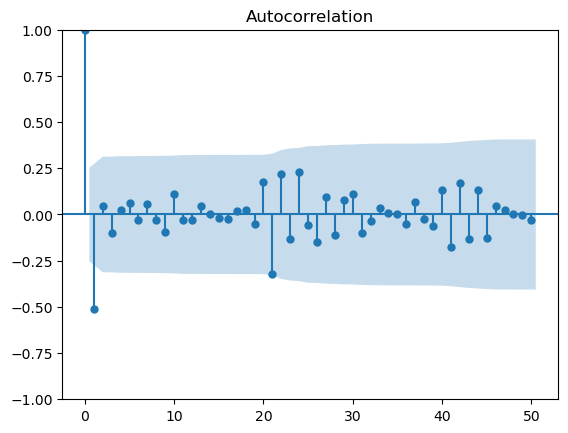

In [59]:
plot_acf(train2["Score"].diff(1).dropna(), lags=50)

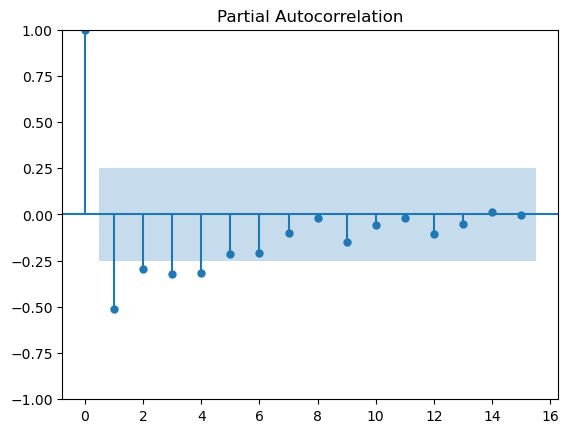

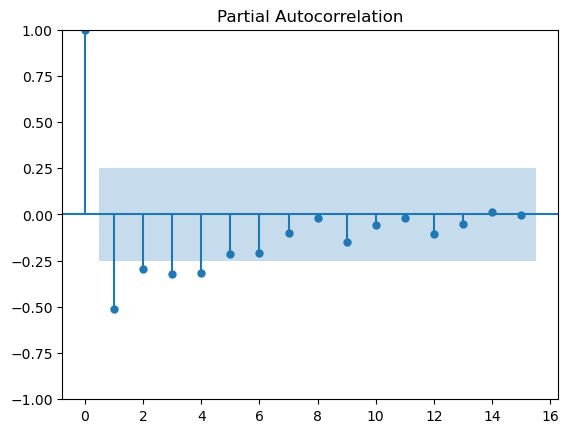

In [62]:
plot_pacf(train2["Score"].diff(1).dropna(), lags=15)

In [63]:
aicVals2 = []
for p in range(5):
    for q in range(5):
        aicVals2.append( [   sm.ARIMA( df["Score"], order=(p, 0, q) ).fit().aic, p, q   ] )

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-inve

In [64]:
aicVals2.sort()
aicVals2

[[3345.7007759687767, 3, 4],
 [3347.0963219967316, 3, 3],
 [3347.5907522336142, 2, 2],
 [3348.4671837724236, 1, 2],
 [3348.558644639363, 2, 1],
 [3349.0122509770226, 3, 2],
 [3349.057510765276, 2, 3],
 [3350.0181251098074, 4, 3],
 [3350.126983577823, 1, 1],
 [3350.41114040721, 1, 3],
 [3350.4787462144377, 3, 1],
 [3350.564590962179, 4, 2],
 [3350.6247783620065, 2, 4],
 [3351.693467952835, 4, 4],
 [3351.8316055192527, 4, 1],
 [3351.867902826086, 1, 4],
 [3364.514060070338, 4, 0],
 [3365.348800217611, 3, 0],
 [3368.017098004179, 0, 4],
 [3368.5668201668705, 0, 3],
 [3368.7143265681716, 1, 0],
 [3368.7436553587568, 2, 0],
 [3370.5376420364173, 0, 1],
 [3370.9375173101816, 0, 2],
 [3383.2951687764394, 0, 0]]

In [79]:
model2 = sm.ARIMA(train2["Score"], order=(3, 0 , 4)).fit()

C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\aad.sray\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [80]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Score   No. Observations:                   61
Model:                 ARIMA(3, 0, 4)   Log Likelihood                -176.736
Date:                Thu, 23 Nov 2023   AIC                            371.472
Time:                        12:47:12   BIC                            390.470
Sample:                             0   HQIC                           378.918
                                 - 61                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6183      0.141     18.558      0.000       2.342       2.895
ar.L1         -0.5122      0.580     -0.883      0.377      -1.649       0.624
ar.L2         -0.2065      0.279     -0.739      0.460      -0.754       0.341
ar.L3          0.5050      0.327      1.543      0.123      -0.136       1.146
ma.L1          0.2088   1364.991      0.000      1.000   -2675.124    2675.542
ma.L2         -0.1396   1650.043  -8.46e-05      1.000   -3234.165    3233.885
ma.L3         -1.0062   1457.485     -0.001      0.999   -2857.625    2855.613
ma.L4         -0.0630     85.997     -0.001      0.999    -168.615     168.489
sigma2        17.6683   2.41e+04      0.001      0.999   -4.72e+04    4.72e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                77.02
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.71
Prob(H) (two-sided):                  0.72   Kurtosis:                         8.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
forecast_values2 = model2.get_forecast(steps=test2.shape[0])

In [82]:
forecast_values2

In [83]:
forecast_ci2 = forecast_values2.conf_int()

In [84]:
forecast_values2.predicted_mean

445    4.211962
446    2.187661
447    3.452252
448    3.304566
449    1.877151
450    3.277412
451    2.780374
452    2.024917
453    3.221666
454    2.513678
455    2.247653
456    3.134500
457    2.377640
458    2.447818
459    3.016046
460    2.328275
461    2.598652
462    2.889160
463    2.337187
464    2.696464
465    2.773140
466    2.380915
467    2.747422
468    2.679416
469    2.440481
470    2.762002
471    2.612315
472    2.501922
473    2.751752
474    2.570990
475    2.556234
476    2.727290
477    2.551433
478    2.598732
Name: predicted_mean, dtype: float64

<Axes: >

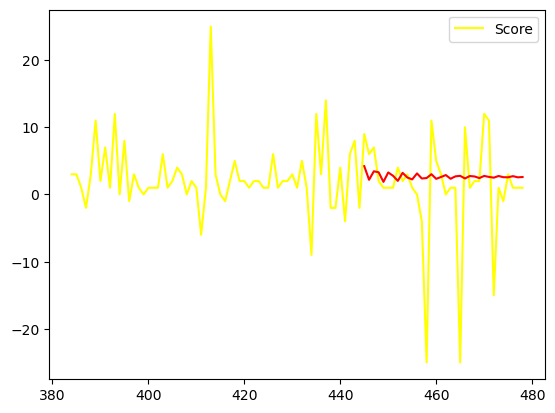

In [120]:
ax = df.iloc[384:].plot( y="Score", legend=True, color="yellow")
forecast_values2.predicted_mean.plot(ax=ax, label="Forecast", color="red")

In [86]:
r2_score(forecast_values2.predicted_mean, test2["Score"])

-347.100248449604

In [87]:
mean_squared_error(forecast_values2.predicted_mean, test2["Score"])

66.91411806856561